In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
# state info: A - 0, B - 1, 2 - terminal state
# action info: left - 0, right - 1
class MaximisationBias:
    def __init__(self):
        self.epsilon = 0.1
        self.start = 0
        
    def getNextState(self, state, action):
        if(state == 0 and action == 1):
            return 2, 0
        elif(state == 0 and action == 0):
            return 1, 0
        elif(state == 1):
            return 2, np.random.normal(-0,1,1)
    
    def episode_double(self, q1, q2):
        state = self.start
        left_count = 0
        
        while(True):
            total_q = q1 + q2
            if(random.random() < self.epsilon):
                if(state == 0):
                    action = np.random.choice([0,1])
                else:
                    action = np.random.choice(range(10))
            else:
                action = np.argmax(total_q[state])
                
            if(state == 0 and action == 0):
                left_count += 1
            next_state, reward = self.getNextState(state, action)
            
            if(random.random() < 0.5):
                q1[state][action] += 0.1*(reward + q2[next_state][np.argmax(q1[next_state])] - q1[state][action])
            else:
                q2[state][action] += 0.1*(reward + q1[next_state][np.argmax(q2[next_state])] - q2[state][action])
            
            state = next_state
            
            if(state == 2):
                break
        return left_count
    
    def episode_single(self, q):
        state = self.start
        left_count = 0
        
        while(True):
            if(random.random() < self.epsilon):
                if(state == 0):
                    action = np.random.choice([0,1])
                else:
                    action = np.random.choice(range(10))
            else:
                action = np.argmax(q[state])
                
            if(state == 0 and action == 0):
                left_count += 1
            next_state, reward = self.getNextState(state, action)
            
            q[state][action] += 0.1*(reward + np.max(q[next_state]) - q[state][action])
            
            state = next_state
            
            if(state == 2):
                break
        return left_count
        
    def figure(self):
        episodes = 300
        runs = 10000
        
        left_count = np.zeros((runs, episodes))
        left_count_single = np.zeros((runs, episodes))
        
        for i in tqdm(range(runs)):
            q1 = [np.zeros(2), np.zeros(10), np.zeros(1)]
            q2 = [np.zeros(2), np.zeros(10), np.zeros(1)]
            q = [np.zeros(2), np.zeros(10), np.zeros(1)]
        
            for j in range(episodes):
                left_count[i,j] = self.episode_double(q1, q2)
                left_count_single[i,j] = self.episode_single(q)
        left_count = left_count.mean(axis=0)
        left_count_single = left_count_single.mean(axis=0)
        
        plt.figure(figsize=(20,10))
        plt.plot(left_count, label="Double")
        plt.plot(left_count_single, label="Single")
        plt.legend()
#         print(left_count)

100%|██████████| 10000/10000 [04:36<00:00, 36.13it/s]


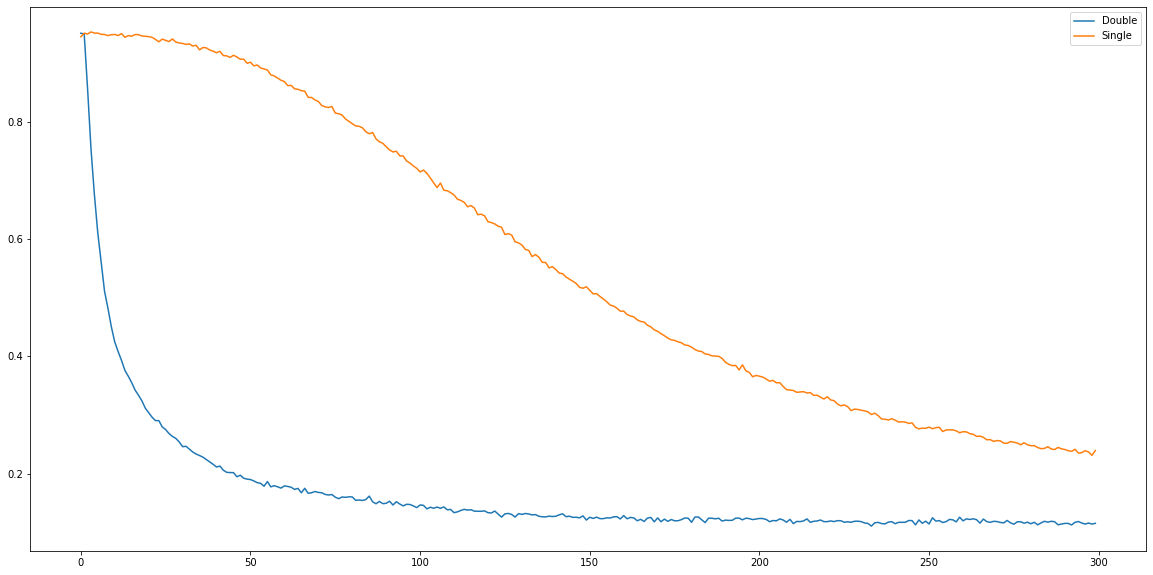

In [3]:
mb = MaximisationBias()
mb.figure()